# 선형 서포트벡터 머신 (Linear SVM)

### 마진을 최대로 하는 서포트벡터와 직선을 찾는 것이 목표

scikit-learn 은 파이썬의 대표적인 머신러닝 라이브러리이다. (신경망과 딥러닝은 주로 tensorflow, keras, PyTorch 를 사용한다)

mglearn은 그래프나 데이터 적재와 관련한 세세한 코드를 일일이 쓰지 않아도 되게끔 만든 유틸리티 함수

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

iris = load_iris()

In [26]:
from sklearn.model_selection import train_test_split

col1 = 0
col2 = 1

X = iris.data[:,[col1, col2]] # 시각화를 위해 속성 2개만 선정
y = iris.target.copy()
y[y==2] = 1 # 타겟값을 setosa(0). others(1)로 설정

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 2), (38, 2), (112,), (38,))

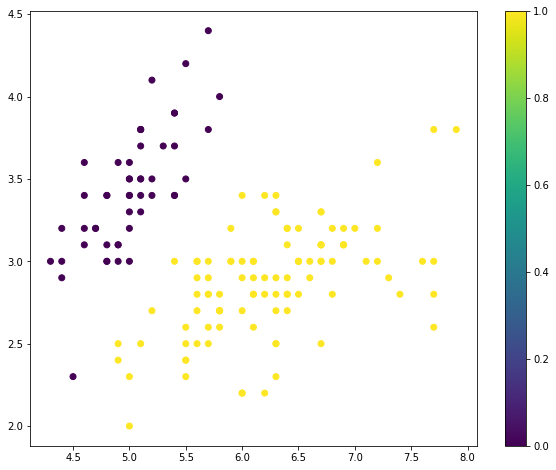

In [4]:
plt.figure(figsize = [10, 8])
plt.scatter(X[:,0], X[:,1], c = y)
plt.colorbar()

In [5]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)

score = model.score(X_train, y_train)
print(score)

0.9910714285714286


In [6]:
score = model.score(X_test, y_test)
print(score)

1.0


선형 SVM도 직선을 찾는 것이므로 기울기(가중치)와 절편 값을 결과로 알려준다

In [7]:
display(model.coef_, model.intercept_)

array([[ 1.39231063, -2.07733586]])

array([-1.06420468])

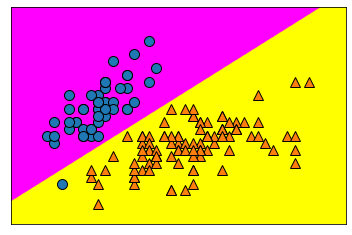

In [8]:
import mglearn

# 전체 데이터
mglearn.plots.plot_2d_classification(model, X_train, eps = 0.5, cm = 'spring')
mglearn.discrete_scatter(X[:,0], X[:,1], y)

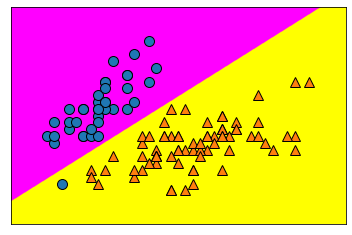

In [10]:
# train 데이터
mglearn.plots.plot_2d_classification(model, X_train, eps = 0.5, cm = 'spring')
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

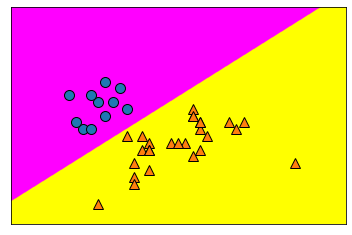

In [11]:
# test 데이터
mglearn.plots.plot_2d_classification(model, X_train, eps = 0.5, cm = 'spring')
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)

Text(0.5, 1.0, 'Linear SVC - iris')

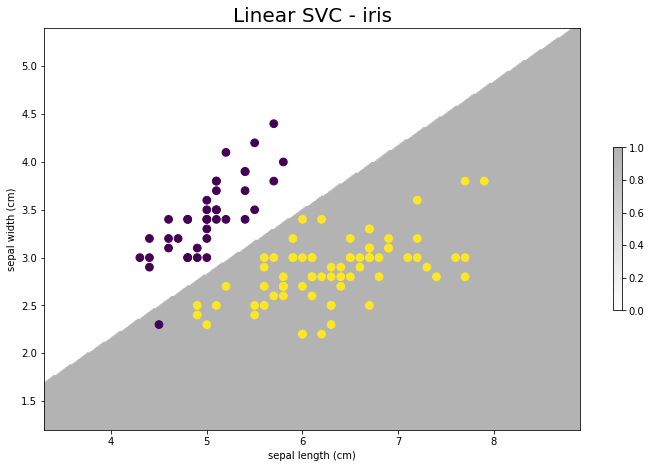

In [17]:
scale = 300
xmax = X_train[:, 0].max() + 1
xmin = X_train[:, 0].min() - 1
ymax = X_train[:, 1].max() + 1
ymin = X_train[:, 1].min() - 1

xx = np.linspace(xmin, xmax, scale)
yy = np.linspace(ymin, ymax, scale)
data1, data2 = np.meshgrid(xx, yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
pred_y = model.predict(X_grid)

fig = plt.figure(figsize = [12, 10])

CS = plt.imshow(pred_y.reshape(scale, scale), interpolation = None, origin = 'lower', extent = [xmin, xmax, ymin, ymax], alpha = 0.3, cmap = 'gray_r')

# draw X_train
plt.scatter(X_train[:,0], X_train[:,1], c = y_train, s = 60)

plt.xlabel(iris.feature_names[col1])
plt.ylabel(iris.feature_names[col2])
plt.colorbar(CS, shrink = 0.3)
plt.title('Linear SVC - iris', fontsize = 20)

In [14]:
w = model.coef_
b = model.intercept_

display(w, b)

array([[ 1.39231063, -2.07733586]])

array([-1.06420468])

LinearSVC 는 C 라는 중요한 옵션을 가진다. C 값이 클수록 모델이 훈련데이터에 과대적합 되는 경향이 생긴다

In [18]:
help(LinearSVC)

Help on class LinearSVC in module sklearn.svm._classes:

class LinearSVC(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LinearSVC(penalty='l2', loss='squared_hinge', *, dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
 |  
 |  Linear Support Vector Classification.
 |  
 |  Similar to SVC with parameter kernel='linear', but implemented in terms of
 |  liblinear rather than libsvm, so it has more flexibility in the choice of
 |  penalties and loss functions and should scale better to large numbers of
 |  samples.
 |  
 |  This class supports both dense and sparse input and the multiclass support
 |  is handled according to a one-vs-the-rest scheme.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  penalty : {'l1', 'l2'}, default='l2'
 |      Specifies t

테스트 데이터에 적용

In [19]:
model.score(X_test, y_test)

1.0

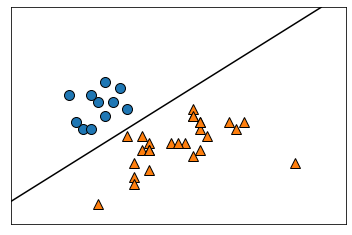

In [20]:
mglearn.plots.plot_2d_separator(model, X_train, eps = 0.5)
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)

In [27]:
pred_y = model.predict(X_test)

display(y_test, pred_y)

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [31]:
X_test[y_test != pred_y]

array([], shape=(0, 2), dtype=float64)

In [32]:
help(model.decision_function)

Help on method decision_function in module sklearn.linear_model._base:

decision_function(X) method of sklearn.svm._classes.LinearSVC instance
    Predict confidence scores for samples.
    
    The confidence score for a sample is proportional to the signed
    distance of that sample to the hyperplane.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        The data matrix for which we want to get the confidence scores.
    
    Returns
    -------
    scores : ndarray of shape (n_samples,) or (n_samples, n_classes)
        Confidence scores per `(n_samples, n_classes)` combination. In the
        binary case, confidence score for `self.classes_[1]` where >0 means
        this class would be predicted.



In [34]:
model.classes_

array([0, 1])

결정 함수 (Decision Function) / 판별 함수 (Distrimination Function)

     - 샘플 공간(관측 공간)에서 결정 영역(Decision Region)으로 대응/사상/매핑시키는 함수
        
        . 선형 결정함수
        
        . 일반화 결정함수

In [35]:
model.decision_function(X_test)

array([ 1.19465655,  1.74267674,  2.71952019,  0.22671717,  1.26538509,
       -1.09931696, -1.7202917 ,  2.03449496,  2.5891932 , -0.95785988,
        0.85214394,  2.09854545,  1.75380682,  2.51401262, -1.23186997,
        1.40906819,  2.10299749, -1.0263624 , -0.75012629,  2.02781691,
        2.16927399,  2.99798232, -1.85729674,  2.17150001,  1.40461616,
        1.75380682, -1.44405559,  0.91619443,  2.03004293,  2.23777652,
        1.68085227,  0.63995832, -0.81862881,  0.91842045,  3.07538891,
        1.82453536,  1.19688257,  1.19688257])

In [36]:
model.predict(X_test)

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

### 할일

옵션에서 C 값 변경

속성 4개와 클래스 3개를 모두 사용

hard-margin과 soft-margin 설명

In [37]:
from sklearn.svm import LinearSVC

model = LinearSVC(C = 1000)
model.fit(X_train, y_train)

score1 = model.score(X_train, y_train)
score2 = model.score(X_test, y_test)
print(score1, score2)

1.0 1.0


c:\Users\das52\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


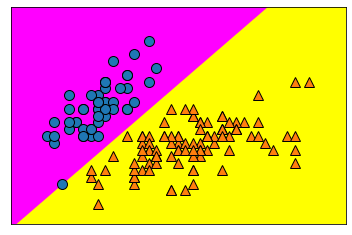

In [38]:
mglearn.plots.plot_2d_classification(model, X_train, eps = 0.5, cm = 'spring')
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

0.9553571428571429 1.0


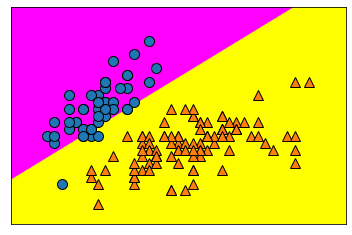

In [39]:
from sklearn.svm import LinearSVC
import mglearn

model = LinearSVC(C = 0.01)
model.fit(X_train, y_train)

score1 = model.score(X_train, y_train)
score2 = model.score(X_test, y_test)
print(score1, score2)

mglearn.plots.plot_2d_classification(model, X_train, eps = 0.5, cm = 'spring')
mglearn.discrete_scatter(X[:,0], X[:,1], y)

모든 속성과 모든 품종 사용

In [40]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearSVC(C = 1)
model.fit(X_train, y_train)

score1 = model.score(X_train, y_train)
score2 = model.score(X_test, y_test)
print(score1, score2)

0.9642857142857143 0.9736842105263158


c:\Users\das52\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [41]:
model.coef_

array([[ 0.10909217,  0.50908993, -0.7267691 , -0.43861343],
       [ 0.10963413, -0.7974276 ,  0.30701966, -0.81809324],
       [-0.67244074, -1.200542  ,  1.2907706 ,  1.7052439 ]])

In [42]:
model.intercept_

array([ 0.07066088,  1.23824433, -1.40136066])

In [43]:
pred_y = model.predict(X_test)
pred_y

array([0, 0, 2, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0,
       1, 2, 2, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [44]:
y_test

array([0, 0, 2, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0,
       1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [45]:
np.where(y_test != pred_y)

(array([23], dtype=int64),)

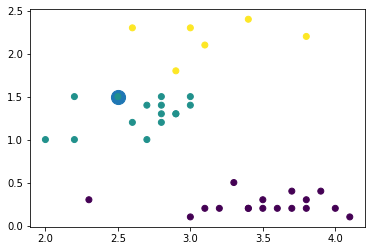

In [46]:
plt.scatter(X_test[23, 1], X_test[23, 3], s = 200)

plt.scatter(X_test[:, 1], X_test[:, 3], c = y_test)

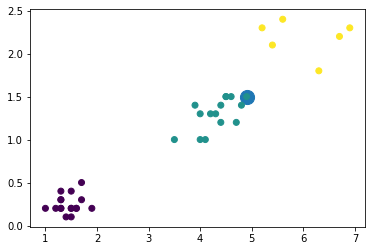

In [47]:
plt.scatter(X_test[23, 2], X_test[23, 3], s = 200)

plt.scatter(X_test[:, 2], X_test[:, 3], c = y_test)

In [48]:
model.decision_function(X_test)

array([[ 0.85221353, -0.72124591, -5.74566509],
       [ 1.365515  , -0.82330267, -7.1973414 ],
       [-2.6337319 , -1.02642819,  1.60132056],
       [ 1.59071682, -0.98477704, -7.18471991],
       [-1.86461105,  0.07932294, -0.75243499],
       [-1.34042847,  0.16175511, -1.54557702],
       [ 0.85662508, -0.527047  , -5.91740612],
       [-2.44406572, -0.5373954 ,  0.78829142],
       [-1.71953429, -0.38563875, -0.40232129],
       [ 1.25993648, -0.89056058, -7.09044932],
       [-1.72981853,  0.13709488, -0.49551064],
       [-2.45916202, -0.70460204,  1.12572843],
       [-1.31569895, -0.16122735, -1.48486734],
       [-1.49390386, -0.22489727, -1.37436348],
       [ 1.060235  , -0.27977647, -6.25309901],
       [-1.47191147, -0.1379008 , -1.28493443],
       [-3.024755  ,  0.18768944,  1.4095439 ],
       [-1.43597533, -0.2926666 , -0.71816914],
       [ 1.77990958, -1.1107832 , -8.21371148],
       [-1.3480037 ,  0.44803533, -0.94170739],
       [ 0.92192883, -0.37992462, -5.944

두 속성과 모든 품종 사용

In [49]:
col1 = 1
col2 = 3

X = iris.data[:,[col1, col2]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearSVC(C = 100)
model.fit(X_train, y_train)

score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)
print(score_train, score_test)

0.8839285714285714 0.9210526315789473


c:\Users\das52\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


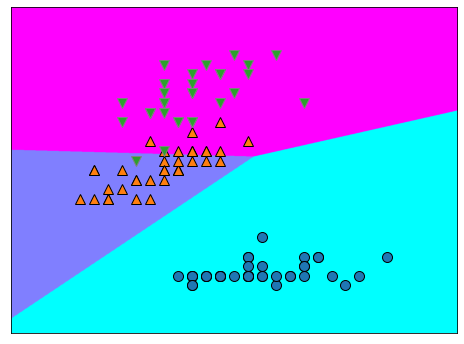

In [50]:
plt.figure(figsize = [8,6])
mglearn.plots.plot_2d_classification(model, X_train, eps = 0.5, cm = 'cool')
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

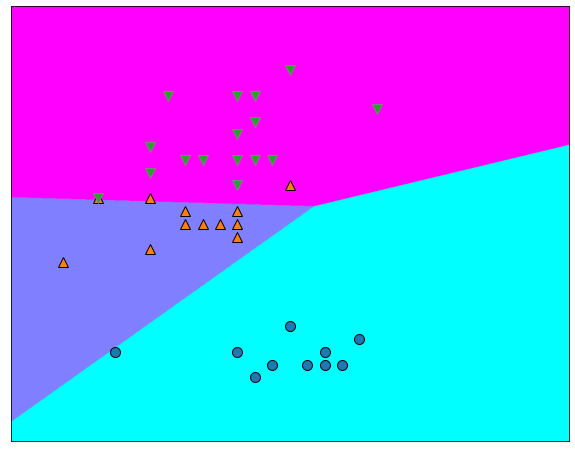

In [51]:
plt.figure(figsize = [10, 8])
mglearn.plots.plot_2d_classification(model, X_train, eps = 0.5, cm = 'cool')
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)

c:\Users\das52\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\das52\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\das52\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\das52\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


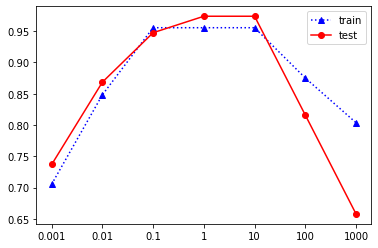

In [55]:
# C값 변경
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

score1 = []
score2 = []
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for C in Cs:
    model = LinearSVC(C = C)
    model.fit(X_train, y_train)
    s1 = model.score(X_train, y_train)
    s2 = model.score(X_test, y_test)
    score1.append(s1)
    score2.append(s2)

plt.plot(score1, 'b^:')
plt.plot(score2, 'ro-')
plt.legend(['train', 'test'])
plt.xticks(range(len(Cs)), Cs)
pass